In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
df = pd.read_csv("output.csv")
df.isnull().sum() / df.shape[0]*100


FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [3]:
df["LaunchSite"].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [4]:
df["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [5]:
outcomes = df["Outcome"].value_counts()
outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [6]:
bad_outcomes=set(outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [7]:
landing_class = []
for i in df["Outcome"]:
    if(i in bad_outcomes):
        landing_class.append(0)
    else:
        landing_class.append(1)
        

In [8]:
df['Class']=landing_class
df["Class"].mean()

df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

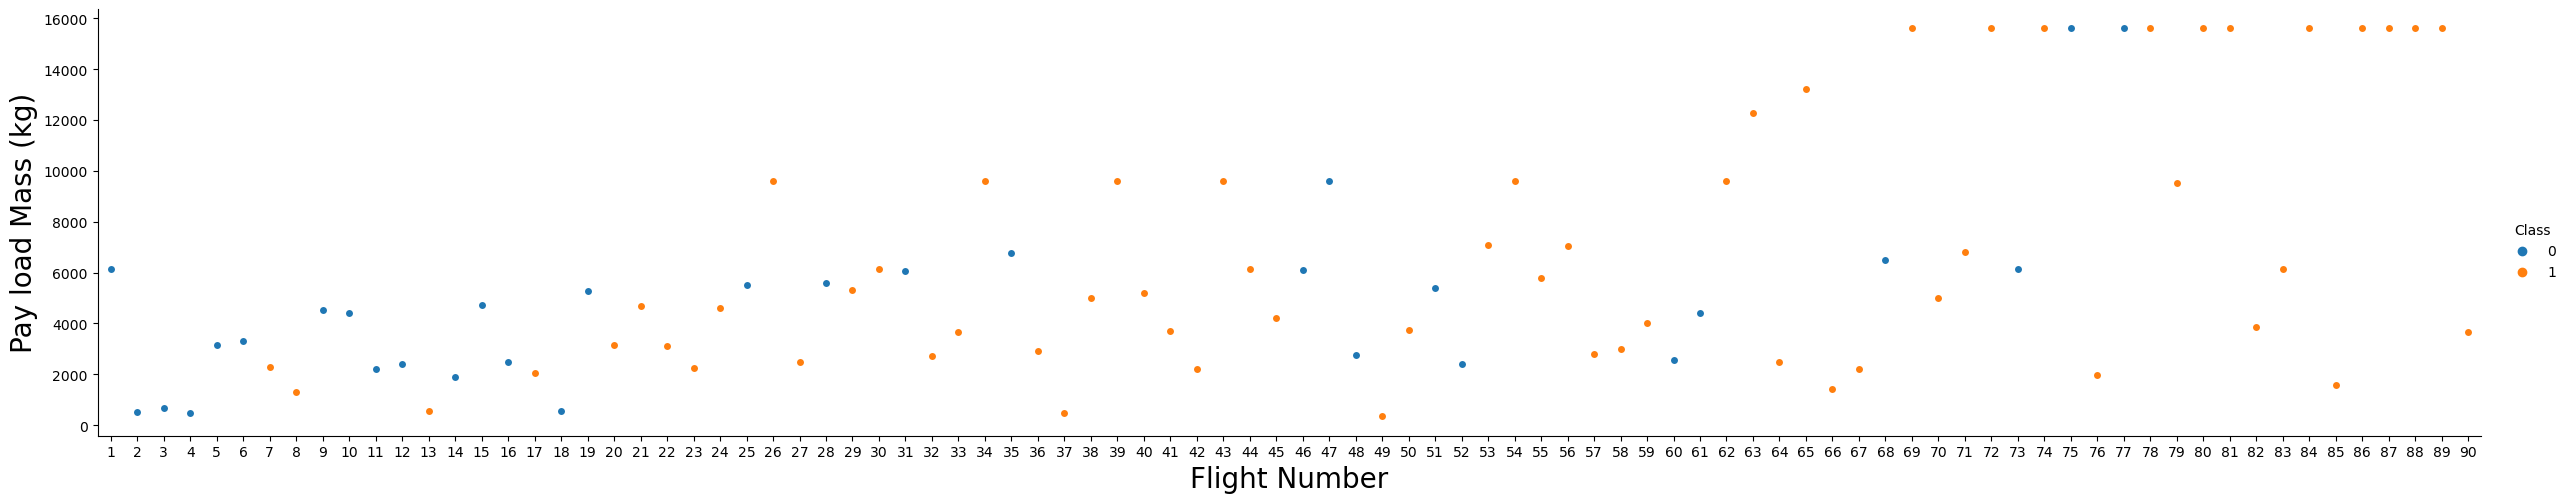

In [10]:
sns.catplot(x = "FlightNumber" , y = "PayloadMass" ,hue = "Class",data = df, aspect =5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Find insights & realtion ships using sns


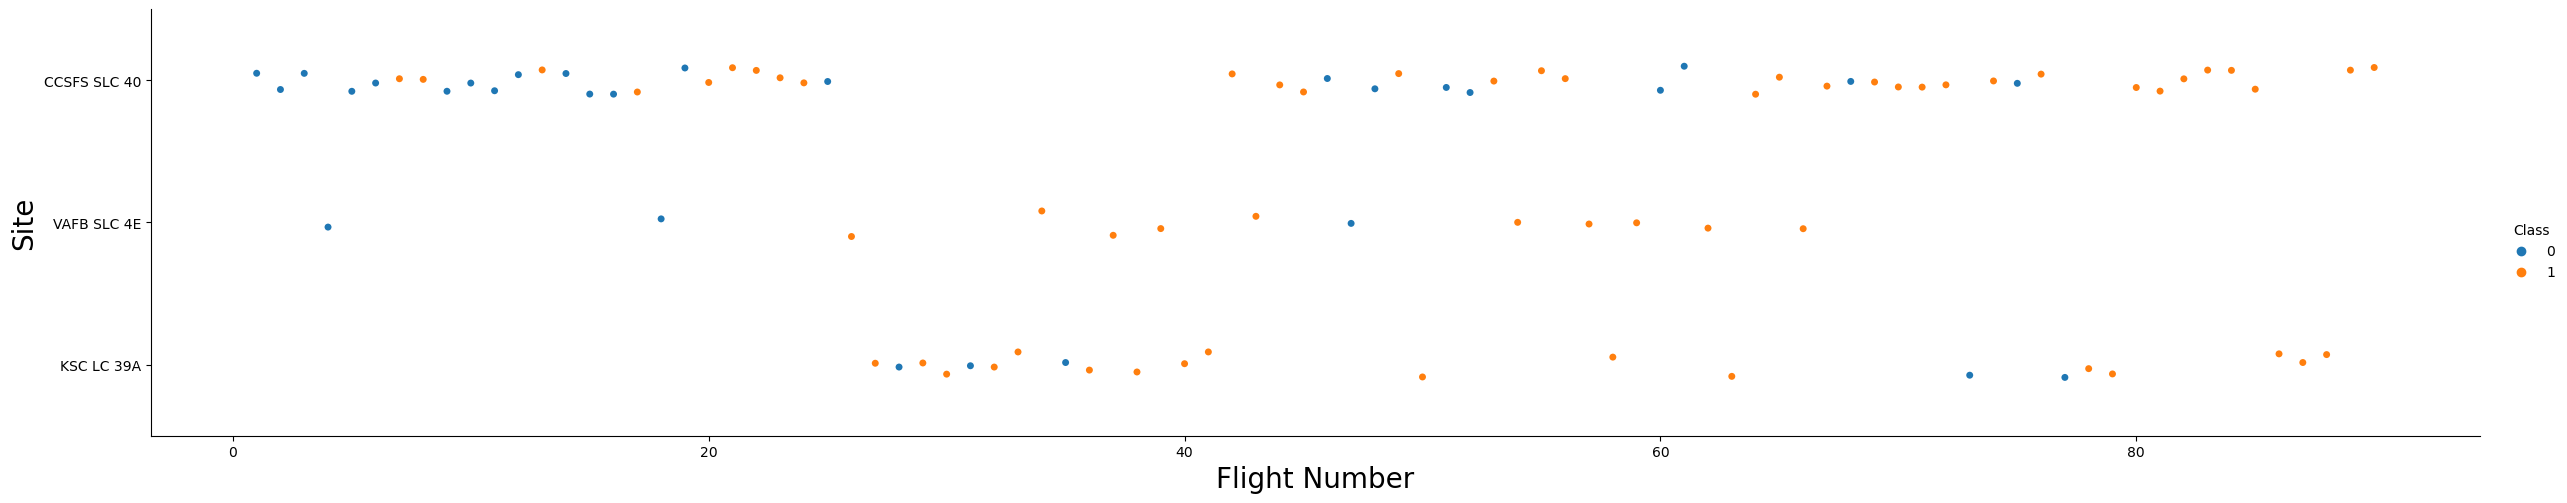

In [13]:
sns.catplot(data = df, x = "FlightNumber", y = "LaunchSite", hue = "Class", aspect = 5)

plt.xlabel("Flight Number" , fontsize = 20)
plt.ylabel("Site" , fontsize = 20)
plt.show()

In [14]:
df.groupby("Orbit")["Class"].mean().reset_index()

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


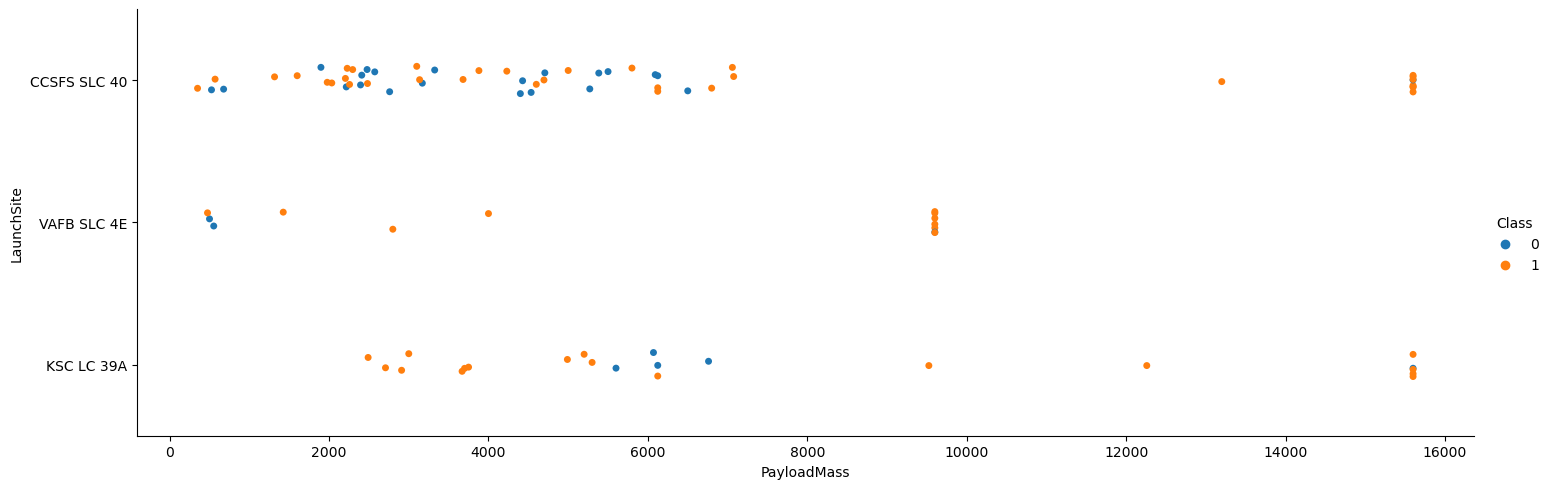

In [15]:
sns.catplot(data = df, x = "PayloadMass" , y = "LaunchSite", aspect = 3, hue = "Class" )




s


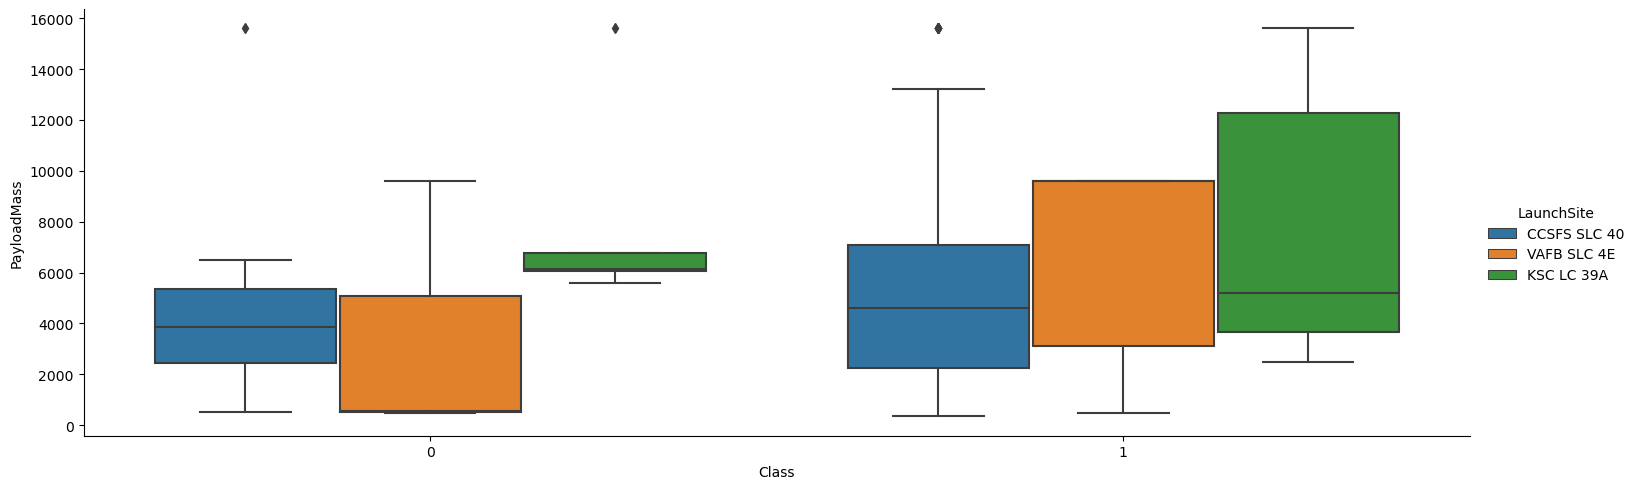

In [16]:
sns.catplot(data = df, x = "Class" , y = "PayloadMass" , kind = "box", aspect = 3, hue = "LaunchSite") 
print("s")

In [17]:
df["LaunchSite"].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [18]:
df[(df["Class"]== 0)& (df["LaunchSite"] =="KSC LC 39A") ]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
27,28,2017-03-16,Falcon 9,5600.000000,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1030,-80.603956,28.608058,0
30,31,2017-05-15,Falcon 9,6070.000000,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1034,-80.603956,28.608058,0
34,35,2017-07-05,Falcon 9,6761.000000,GTO,KSC LC 39A,None None,1,False,False,False,NaN,3.0,0,B1037,-80.603956,28.608058,0
72,73,2020-01-19,Falcon 9,6123.547647,SO,KSC LC 39A,None None,4,False,True,False,NaN,5.0,3,B1046,-80.603956,28.608058,0
76,77,2020-03-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0


In [19]:
df[(df["Class"]== 1)& (df["LaunchSite"] =="KSC LC 39A") ]["GridFins"]

26    True
28    True
29    True
31    True
32    True
35    True
37    True
39    True
40    True
49    True
57    True
62    True
77    True
78    True
85    True
86    True
87    True
Name: GridFins, dtype: bool

### We can clearly note that all launhces at the site of KSC LC 39A	 with GridFins had a sucess rate of 100 %